In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import plotly.graph_objects as go
from IPython.display import HTML
import sympy as smp
from sympy.vector import cross

In [55]:
phi = np.linspace(0, 2*np.pi, 100)

def l_(phi):
  return [
          np.array([0.5*np.cos(phi), 0.5*np.sin(phi), 1.5*np.ones(len(phi))]),
          np.array([0.5*np.cos(-phi), 0.5*np.sin(-phi), -1.5*np.ones(len(-phi))]),
          np.array([1.5*np.ones(len(phi)), 0.5*np.cos(phi), 0.5*np.sin(phi)]),
          np.array([-1.5*np.ones(len(-phi)), 0.5*np.cos(-phi), 0.5*np.sin(-phi)]),
          np.array([0.5*np.sin(phi), 1.5*np.ones(len(phi)), 0.5*np.cos(phi)]),
          np.array([0.5*np.sin(-phi), -1.5*np.ones(len(-phi)), 0.5*np.cos(-phi)])
  ]

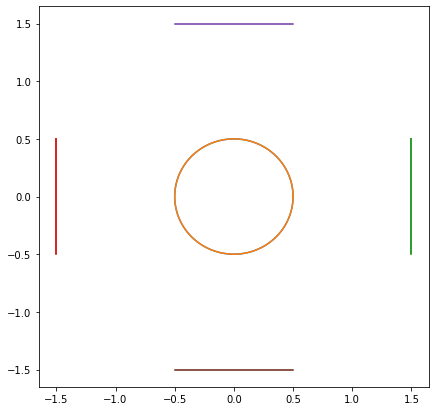

In [56]:
plt.figure(figsize=(7,7))
for l in l_(phi):
  plt.plot(l[0], l[1])
plt.show()

In [58]:
t, x, y, z = smp.symbols('t, x, y, z')

In [59]:
l = [
          smp.Matrix([0.5*smp.cos(t), 0.5*smp.sin(t), 1.5]),
          smp.Matrix([0.5*smp.cos(-t), 0.5*smp.sin(-t), -1.5]),
          smp.Matrix([1.5, 0.5*smp.cos(t), 0.5*smp.sin(t)]),
          smp.Matrix([-1.5, 0.5*smp.cos(-t), 0.5*smp.sin(-t)]),
          smp.Matrix([0.5*smp.sin(t), 1.5, 0.5*smp.cos(t)]),
          smp.Matrix([0.5*smp.sin(-t), -1.5, 0.5*smp.cos(-t)])
  ]

r = smp.Matrix([x, y, z])
sep = [r-ll for ll in l]

In [60]:
integrand = [smp.diff(l[i], t).cross(sep[i]) / sep[i].norm()**3 for i in range(6)]

In [61]:
dBxdt = [smp.lambdify([t, x, y, z], inte[0]) for inte in integrand]
dBydt = [smp.lambdify([t, x, y, z], inte[1]) for inte in integrand]
dBzdt = [smp.lambdify([t, x, y, z], inte[2]) for inte in integrand]

In [62]:
def B(x, y, z):
    return np.array([sum([quad(dBxdt[i], 0, 2*np.pi, args=(x, y, z))[0] for i in range(6)]),
                     sum([quad(dBydt[i], 0, 2*np.pi, args=(x, y, z))[0] for i in range(6)]),
                     sum([quad(dBzdt[i], 0, 2*np.pi, args=(x, y, z))[0] for i in range(6)])])

In [102]:
x = np.linspace(-2, 2, 20)
xv, yv, zv = np.meshgrid(x, x, x)

In [ ]:
B_field = np.vectorize(B, signature='(),(),()->(n)')(xv, yv, zv)

In [99]:
Bx = B_field[10:30,10:30,10:30,0].copy()
By = B_field[10:30,10:30,10:30,1].copy()
Bz = B_field[10:30,10:30,10:30,2].copy()

In [100]:
Bx[Bx>10] = 10
By[By>10] = 10
Bz[Bz>10] = 10

Bx[Bx<-10] = -10
By[By<-10] = -10
Bz[Bz<-10] = -10

In [103]:
data = go.Cone(x=xv.ravel(), y=yv.ravel(), z=zv.ravel(),
               u=Bx.ravel(), v=By.ravel(), w=Bz.ravel(),
               colorscale='Inferno', colorbar=dict(title='$x^2$'),
               sizemode="absolute", sizeref=20)

layout = go.Layout(title=r'Plot Title',
                     scene=dict(xaxis_title=r'x',
                                yaxis_title=r'y',
                                zaxis_title=r'z',
                                aspectratio=dict(x=1, y=1, z=1),
                                camera_eye=dict(x=1.2, y=1.2, z=1.2)))

fig = go.Figure(data = data, layout=layout)
for l in l_(phi):
  fig.add_scatter3d(x=l[0], y=l[1], z=l[2], mode='lines',
                    line = dict(color='green', width=10))

fig.show()